In [1]:
import mlrose_hiive as ml
import numpy as np

In [2]:
import time
import math

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
all_fitness_data = {}

In [5]:
runs = 5

In [6]:
all_fitness_data['pk'] = {}

t_pct = 0.4

In [7]:
problem_sizes = np.linspace(40, 400, 10).astype(int).tolist()

In [8]:
all_fitness_data['pk']['rhc'] = {}

for size in problem_sizes:

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.random_hill_climb(problem, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    all_fitness_data['pk']['rhc'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]

In [9]:
all_fitness_data['pk']['sa'] = {}

schedule = ml.ExpDecay()

for size in problem_sizes:
    print(f'{size}:', end=' ')

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    all_fitness_data['pk']['sa'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

40: 1 2 3 4 5 
80: 1 2 3 4 5 
120: 1 2 3 4 5 
160: 1 2 3 4 5 
200: 1 2 3 4 5 
240: 1 2 3 4 5 
280: 1 2 3 4 5 
320: 1 2 3 4 5 
360: 1 2 3 4 5 
400: 1 2 3 4 5 


In [10]:
all_fitness_data['pk']['ga'] = {}

for size in problem_sizes:
    print(f'{size}:', end=' ')

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    all_fitness_data['pk']['ga'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

40: 1 2 3 4 5 
80: 1 2 3 4 5 
120: 1 2 3 4 5 
160: 1 2 3 4 5 
200: 1 2 3 4 5 
240: 1 2 3 4 5 
280: 1 2 3 4 5 
320: 1 2 3 4 5 
360: 1 2 3 4 5 
400: 1 2 3 4 5 


In [11]:
def transform_data(data, problem_name):
    rows = []
    for algorithm, sizes in data[problem_name].items():
        for size, metrics in sizes.items():
            rows.append({'Algorithm': algorithm, 'Size': size, 'Fit': metrics['best_fitness'], 'Time': metrics['time'], 'Curve': metrics['fit_curve']})
            
    return pd.DataFrame(rows)

In [12]:
pk_fit_df = transform_data(all_fitness_data, 'pk')

In [13]:
pk_fit_df

,Algorithm,Size,Fit,Time,Curve
0,rhc,40,40.0,0.007000,"[[2.0, 1.0], [2.0, 2.0], [2.0, 3.0], [2.0, 4.0..."
1,rhc,80,10.0,0.005007,"[[0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0..."
2,rhc,120,6.0,0.004000,"[[2.0, 1.0], [2.0, 2.0], [2.0, 3.0], [2.0, 4.0..."
3,rhc,160,12.0,0.004000,"[[2.0, 1.0], [2.0, 2.0], [2.0, 3.0], [2.0, 4.0..."
4,rhc,200,4.0,0.001000,"[[2.0, 1.0], [2.0, 2.0], [2.0, 3.0], [2.0, 4.0..."
5,rhc,240,5.0,0.001000,"[[1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [1.0, 4.0..."
6,rhc,280,2.0,0.000000,"[[2.0, 1.0], [2.0, 2.0], [2.0, 3.0], [2.0, 4.0..."
7,rhc,320,6.0,0.002000,"[[0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0..."
8,rhc,360,5.0,0.000000,"[[5.0, 1.0], [5.0, 2.0], [5.0, 3.0], [5.0, 4.0..."
9,rhc,400,5.0,0.001000,"[[5.0, 1.0], [5.0, 2.0], [5.0, 3.0], [5.0, 4.0..."


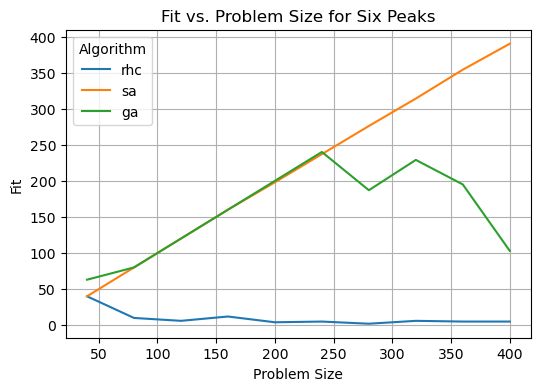

In [20]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Fit', hue='Algorithm', data=pk_fit_df)
plt.title(f'Fit vs. Problem Size for Six Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Fit')
# plt.xscale('linear')
plt.grid(True)
plt.show()

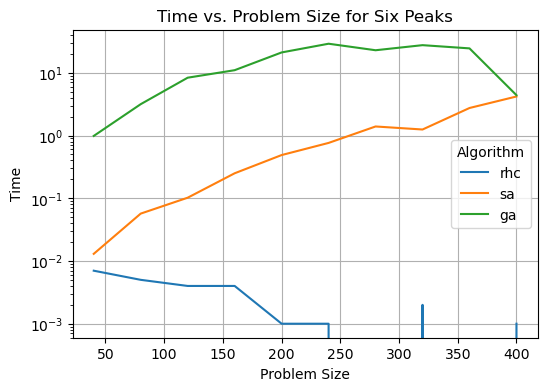

In [21]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Time', hue='Algorithm', data=pk_fit_df)
plt.title(f'Time vs. Problem Size for Six Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Time')
# plt.xscale('linear')
plt.yscale('log')
plt.grid(True)
plt.show()

In [16]:
algs = ['rhc', 'sa', 'ga']

In [17]:
pk_curve_data = {}

for alg in algs:
    pk_curve_data[alg] = pd.DataFrame(list(map(lambda x: (int(x[1]), x[0]), pk_fit_df.query(f"(Algorithm == '{alg}') & (Size == {problem_sizes[-2]})").iloc[0].Curve.tolist())), columns=['FEvals', 'Fit'])
    pk_curve_data[alg]['Time'] = np.linspace(0, pk_fit_df.query(f"(Algorithm == '{alg}') & (Size == {problem_sizes[-2]})").iloc[0].Time, pk_curve_data[alg].shape[0])

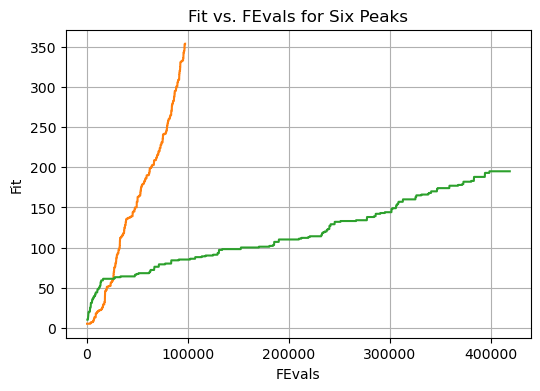

In [76]:
plt.figure(figsize=(6, 4))

for alg in algs:
    sns.lineplot(x=pk_curve_data[alg]['FEvals'], y=pk_curve_data[alg]['Fit'])

plt.title(f'Fit vs. FEvals for Six Peaks')
plt.xlabel('FEvals')
plt.ylabel('Fit')
# plt.xscale('log')
plt.grid(True)
plt.show()

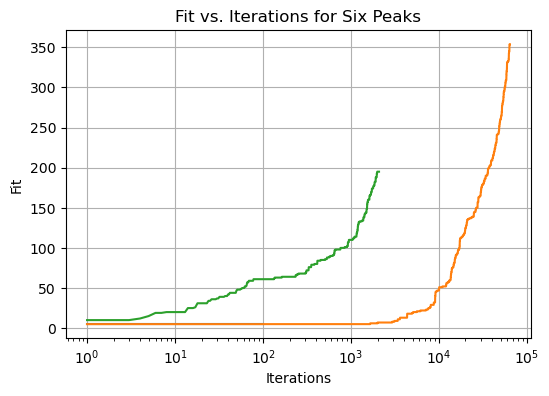

In [78]:
plt.figure(figsize=(6, 4))

for alg in algs:
    sns.lineplot(x=pk_curve_data[alg].index.to_numpy()+1, y=pk_curve_data[alg]['Fit'])

plt.title(f'Fit vs. Iterations for Six Peaks')
plt.xlabel('Iterations')
plt.ylabel('Fit')
plt.xscale('log')
plt.grid(True)
plt.show()

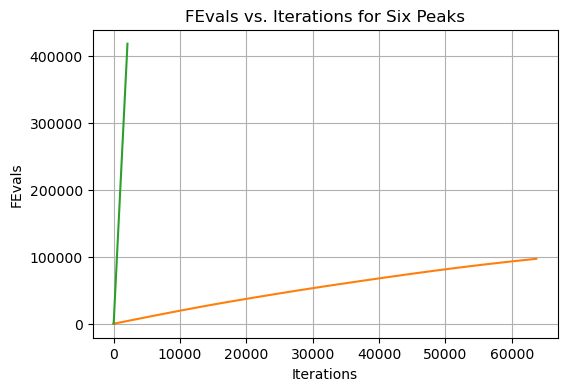

In [72]:
plt.figure(figsize=(6, 4))

for alg in algs:
    sns.lineplot(x=pk_curve_data[alg].index.to_numpy()+1, y=pk_curve_data[alg]['FEvals'])

plt.title(f'FEvals vs. Iterations for Six Peaks')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
# plt.yscale('log')
plt.grid(True)
plt.show()

In [25]:
import pickle

In [26]:
with open('pk_pickle.pkl', 'wb') as file:
    pickle.dump(all_fitness_data, file)

In [63]:
pk_fit_df['Total FEvals'] = pk_fit_df.Curve.apply(lambda c: c.sum(axis=0)[1])

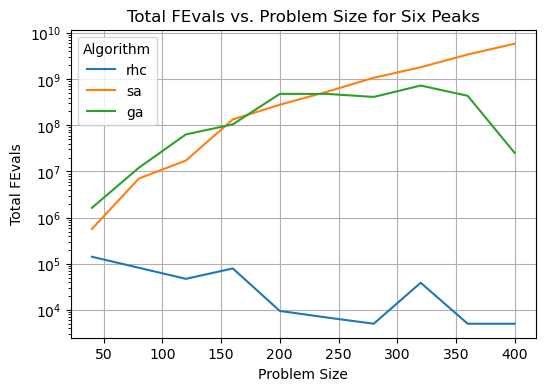

In [64]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Total FEvals', hue='Algorithm', data=pk_fit_df)
plt.title(f'Total FEvals vs. Problem Size for Six Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Total FEvals')
# plt.xscale('linear')
plt.yscale('log')
plt.grid(True)
plt.show()

In [68]:
pk_fit_df['Total Iterations'] = pk_fit_df.Curve.apply(lambda c: c.shape[0])

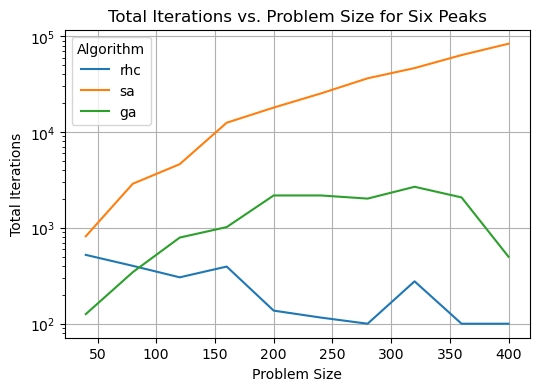

In [80]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Total Iterations', hue='Algorithm', data=pk_fit_df)
plt.title(f'Total Iterations vs. Problem Size for Six Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Total Iterations')
# plt.xscale('linear')
plt.yscale('log')
plt.grid(True)
plt.show()

In [27]:
sa_fitness_data = {}
sa_fitness_data['pk'] = {}

In [36]:
sa_fitness_data['pk']['default'] = {}

schedule = ml.ExpDecay()

for size in problem_sizes:
    print(f'{size}:', end=' ')

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    sa_fitness_data['pk']['default'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

40: 1 2 3 4 5 
80: 1 2 3 4 5 
120: 1 2 3 4 5 
160: 1 2 3 4 5 
200: 1 2 3 4 5 
240: 1 2 3 4 5 
280: 1 2 3 4 5 
320: 1 2 3 4 5 
360: 1 2 3 4 5 
400: 1 2 3 4 5 


In [47]:
sa_fitness_data['pk']['setting 1'] = {}

schedule = ml.ExpDecay(init_temp=10)

for size in problem_sizes:
    print(f'{size}:', end=' ')

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    sa_fitness_data['pk']['setting 1'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

40: 1 2 3 4 5 
80: 1 2 3 4 5 
120: 1 2 3 4 5 
160: 1 2 3 4 5 
200: 1 2 3 4 5 
240: 1 2 3 4 5 
280: 1 2 3 4 5 
320: 1 2 3 4 5 
360: 1 2 3 4 5 
400: 1 2 3 4 5 


In [49]:
sa_fitness_data['pk']['setting 2'] = {}

schedule = ml.ExpDecay(init_temp=10, exp_const=0.01, min_temp=1)

for size in problem_sizes:
    print(f'{size}:', end=' ')

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    sa_fitness_data['pk']['setting 2'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

40: 1 2 3 4 5 
80: 1 2 3 4 5 
120: 1 2 3 4 5 
160: 1 2 3 4 5 
200: 1 2 3 4 5 
240: 1 2 3 4 5 
280: 1 2 3 4 5 
320: 1 2 3 4 5 
360: 1 2 3 4 5 
400: 1 2 3 4 5 


In [52]:
sa_fit_df = transform_data(sa_fitness_data, 'pk')

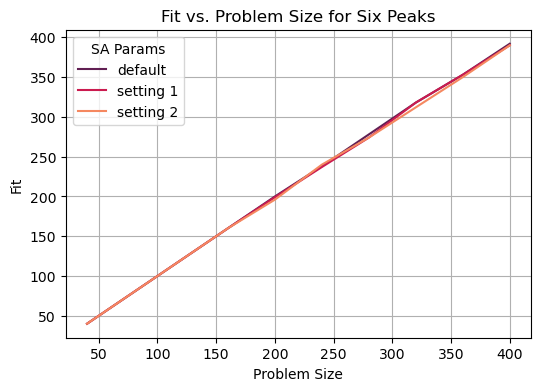

In [53]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Fit', hue='SA Params', data=sa_fit_df.rename(columns={'Algorithm': 'SA Params'}), palette='rocket')
plt.title(f'Fit vs. Problem Size for Six Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Fit')
# plt.xscale('linear')
plt.grid(True)
plt.show()

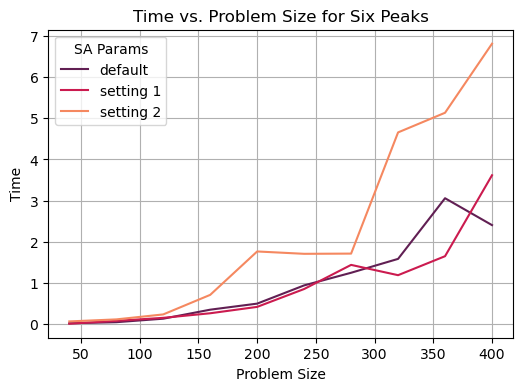

In [54]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Time', hue='SA Params', data=sa_fit_df.rename(columns={'Algorithm': 'SA Params'}), palette='rocket')
plt.title(f'Time vs. Problem Size for Six Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Time')
# plt.xscale('linear')
# plt.yscale('log')
plt.grid(True)
plt.show()

In [55]:
ga_fitness_data = {}
ga_fitness_data['pk'] = {}

In [56]:
ga_fitness_data['pk']['default'] = {}

for size in problem_sizes:
    print(f'{size}:', end=' ')

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    ga_fitness_data['pk']['default'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

40: 1 2 3 4 5 
80: 1 2 3 4 5 
120: 1 2 3 4 5 
160: 1 2 3 4 5 
200: 1 2 3 4 5 
240: 1 2 3 4 5 
280: 1 2 3 4 5 
320: 1 2 3 4 5 
360: 1 2 3 4 5 
400: 1 2 3 4 5 


In [57]:
ga_fitness_data['pk']['setting 1'] = {}

for size in problem_sizes:
    print(f'{size}:', end=' ')

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, pop_size=50, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    ga_fitness_data['pk']['setting 1'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

40: 1 2 3 4 5 
80: 1 2 3 4 5 
120: 1 2 3 4 5 
160: 1 2 3 4 5 
200: 1 2 3 4 5 
240: 1 2 3 4 5 
280: 1 2 3 4 5 
320: 1 2 3 4 5 
360: 1 2 3 4 5 
400: 1 2 3 4 5 


In [58]:
ga_fitness_data['pk']['setting 2'] = {}

for size in problem_sizes:
    print(f'{size}:', end=' ')

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, pop_size=400, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    ga_fitness_data['pk']['setting 2'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

40: 1 2 3 4 5 
80: 1 2 3 4 5 
120: 1 2 3 4 5 
160: 1 2 3 4 5 
200: 1 2 3 4 5 
240: 1 2 3 4 5 
280: 1 2 3 4 5 
320: 1 2 3 4 5 
360: 1 2 3 4 5 
400: 1 2 3 4 5 


In [59]:
ga_fitness_data['pk']['setting 3'] = {}

for size in problem_sizes:
    print(f'{size}:', end=' ')

    fitness = ml.SixPeaks(t_pct=t_pct)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, mutation_prob=0.25, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    ga_fitness_data['pk']['setting 3'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

40: 1 2 3 4 5 
80: 1 2 3 4 5 
120: 1 2 3 4 5 
160: 1 2 3 4 5 
200: 1 2 3 4 5 
240: 1 2 3 4 5 
280: 1 2 3 4 5 
320: 1 2 3 4 5 
360: 1 2 3 4 5 
400: 1 2 3 4 5 


In [60]:
ga_fit_df = transform_data(ga_fitness_data, 'pk')

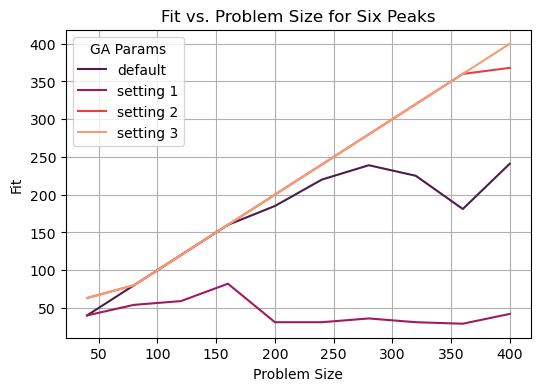

In [61]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Fit', hue='GA Params', data=ga_fit_df.rename(columns={'Algorithm': 'GA Params'}), palette='rocket')
plt.title(f'Fit vs. Problem Size for Six Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Fit')
# plt.xscale('linear')
plt.grid(True)
plt.show()

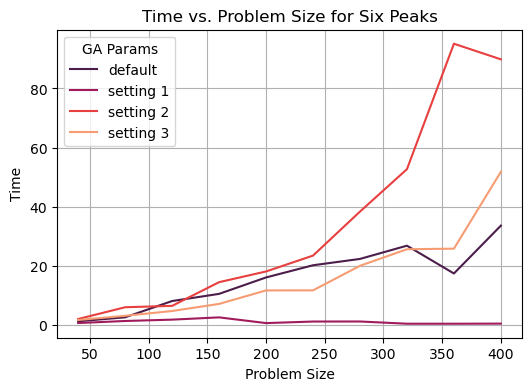

In [62]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Time', hue='GA Params', data=ga_fit_df.rename(columns={'Algorithm': 'GA Params'}), palette='rocket')
plt.title(f'Time vs. Problem Size for Six Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Time')
# plt.xscale('linear')
# plt.yscale('log')
plt.grid(True)
plt.show()